In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import models, layers, losses

# Data Understanding

In [3]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Show training data
print(train.shape) # rows, columns
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Show test data
print(test.shape) # rows, columns
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


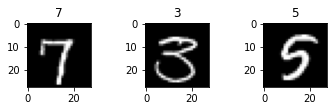

In [6]:
# Data visualization
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(
        train.iloc[i, 1:].values.reshape(28, 28), 
        cmap=plt.get_cmap('gray')
    )
    plt.title(train.iloc[i, 0]);

# Data Preparation

In [7]:
# Export input variables
x_train = train.iloc[:40000, 1:].values.astype('float32') / 255.0
x_validation = train.iloc[40000:, 1:].values.astype('float32') / 255.0
x_test = test.values.astype('float32') / 255.0

# Reshape input variables
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Export labels
y_train = train.iloc[:40000, 0].values.astype('int32')
y_validation = train.iloc[40000:, 0].values.astype('int32')

# Modeling

In [8]:
# Build the model (taken from a tensorflow tutorial)
model = keras.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(10)
])

In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
# Create a callback that saves the model
callback = keras.callbacks.ModelCheckpoint(
    filepath='model.h5',
    save_best_only=True,
    verbose=1
)

In [11]:
# Train the model
history = model.fit(
    x=x_train, 
    y=y_train, 
    epochs=50,
    batch_size=128,
    callbacks=[callback],
    validation_data=(x_validation, y_validation)
);

Epoch 1/50
309/313 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9237
Epoch 00001: val_loss improved from inf to 0.08069, saving model to model.h5
313/313 [==============================] - 1s 4ms/step - loss: 0.2537 - accuracy: 0.9242 - val_loss: 0.0807 - val_accuracy: 0.9760
Epoch 2/50
299/313 [===========================>..] - ETA: 0s - loss: 0.0631 - accuracy: 0.9810
Epoch 00002: val_loss improved from 0.08069 to 0.06532, saving model to model.h5
313/313 [==============================] - 1s 4ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0653 - val_accuracy: 0.9790
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9881
Epoch 00003: val_loss improved from 0.06532 to 0.04570, saving model to model.h5
313/313 [==============================] - 1s 4ms/step - loss: 0.0418 - accuracy: 0.9881 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 4/50
309/313 [============================>.] - ETA: 0s - loss: 0.0322 - a

# Evaluation

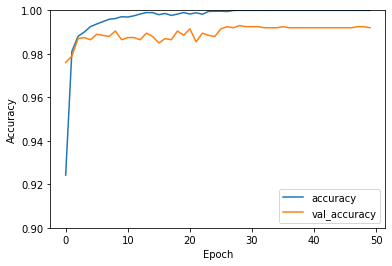

In [12]:
# Plot the learning curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right');

In [13]:
# Load the best model
model = models.load_model('model.h5')
model.evaluate(x=x_validation, y=y_validation);

63/63 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.1000


## Submission

In [14]:
# Make prediction for test data
predictions = np.argmax(model.predict(x_test), axis=-1)
submission=pd.DataFrame({
    "ImageId": list(range(1,len(predictions)+1)),
    "Label": predictions
    })
submission.to_csv("submission.csv", index=False, header=True)